<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/notebooks/5_eda_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

### **Conteúdo**
- **1.1.** Visão Geral
- **1.2.** Panorama Geral
- **1.3.** Análise Temporal
- **1.4.** Perfil Sociodemográfico
- **1.5.** Diagnóstico
- **1.6.** Análise Geográfica
- **1.7.** Óbito

### **Histórico de Alterações**

**Data:** 05/02/2026 | **Autor:** Larissa Tinem | Visão geral, panorama geral, análise temporal, perfil sociodemográfico, diagnóstico, análise geográfica, óbito


# **1. Análise Exploratória — Pandemia**

## **Objetivo**

Analisar o comportamento das internações por transtornos mentais durante a pandemia, identificando padrões temporais, demográficos e regionais.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## **1.1. Visão Geral**

In [ ]:
# Criando o dataframe
df = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pandemia.parquet')

# Visualizando as 5 primeiras linhas
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,NASC,IDADE,SEXO,RACA_COR,ESPEC,IDENT,MUNIC_RES,...,COBRANCA,MUNIC_MOV,CID_ASSO,CID_MORTE,COMPLEX,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,MORTE
233,350000,2020,1,1998-05-17,21,1,01,05,1,354800,...,15,350950,0000,0000,02,2019-12-21,2019-12-22,1,1,0
234,350000,2020,1,1990-04-07,29,1,01,05,1,352050,...,12,350950,0000,0000,02,2020-01-02,2020-01-04,2,2,0
235,350000,2020,1,1978-09-20,41,1,02,05,1,350950,...,12,350950,0000,0000,02,2019-12-30,2020-01-02,3,3,0
236,350000,2020,1,1975-11-19,44,3,01,05,1,350950,...,15,350950,0000,0000,02,2019-12-31,2020-01-10,10,10,0
237,350000,2020,1,1999-05-06,20,1,01,05,1,355240,...,15,350950,0000,0000,02,2019-10-01,2019-10-11,10,10,0


In [ ]:
# Quantidade de linhas e colunas
print(df.shape)

(241285, 23)


In [ ]:
# Colunas
print('COLUNAS: ', df.columns)
print('-'*80)

# Informações sobre o dataset
print('INFORMAÇÕES: ')
print(df.dtypes)

COLUNAS:  Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC', 'IDADE', 'SEXO', 'RACA_COR',
       'ESPEC', 'IDENT', 'MUNIC_RES', 'DIAG_PRINC', 'DIAG_SECUN', 'CAR_INT',
       'COBRANCA', 'MUNIC_MOV', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'DT_INTER',
       'DT_SAIDA', 'QT_DIARIAS', 'DIAS_PERM', 'MORTE'],
      dtype='object')
--------------------------------------------------------------------------------
INFORMAÇÕES: 
UF_ZI                 object
ANO_CMPT               int64
MES_CMPT               int64
NASC          datetime64[ns]
IDADE                  int64
SEXO                  object
RACA_COR              object
ESPEC                 object
IDENT                 object
MUNIC_RES             object
DIAG_PRINC            object
DIAG_SECUN            object
CAR_INT               object
COBRANCA              object
MUNIC_MOV             object
CID_ASSO              object
CID_MORTE             object
COMPLEX               object
DT_INTER      datetime64[ns]
DT_SAIDA      datetime64[ns]
QT_

In [ ]:
df.describe()

,ANO_CMPT,MES_CMPT,NASC,IDADE,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM
count,241285.000000,241285.000000,241285,241285.000000,241285,241285,241285.000000,241285.000000
mean,2021.003216,6.483528,1978-09-15 19:27:50.351658880,42.231933,2020-07-08 05:17:45.758749696,2021-07-03 02:56:40.324097792,16.423914,16.967590
min,2020.000000,1.000000,1900-01-01 00:00:00,0.000000,2008-01-01 00:00:00,2019-08-31 00:00:00,0.000000,0.000000
25%,2020.000000,3.000000,1968-01-07 00:00:00,30.000000,2020-04-09 00:00:00,2020-09-30 00:00:00,4.000000,5.000000
50%,2021.000000,7.000000,1979-09-01 00:00:00,41.000000,2021-03-21 00:00:00,2021-07-12 00:00:00,15.000000,16.000000
75%,2022.000000,10.000000,1991-01-01 00:00:00,53.000000,2022-02-09 00:00:00,2022-04-07 00:00:00,30.000000,30.000000
max,2022.000000,12.000000,2022-07-24 00:00:00,99.000000,2022-12-31 00:00:00,2022-12-31 00:00:00,114.000000,120.000000
std,0.823938,3.507906,NaN,15.800675,NaN,NaN,11.888779,11.900318


In [ ]:
# Verificando valores nulos
df.isnull().sum()

,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,0
ESPEC,0
IDENT,0
MUNIC_RES,0


In [ ]:
print('Ano mínimo: ', df['ANO_CMPT'].min())
print('Ano máximo: ', df['ANO_CMPT'].max())

Ano mínimo:  2020
Ano máximo:  2022


## **1.2. Panorama Geral**

### **1.2.1. Número total de internações**

**Análise Inicial**

- **Quantidade de linhas:** 241.285
- **Quantidade de internações:** 238.632
- **Diferença:** 2653

A base apresentou aproximadamente 1,1% de registros duplicados, associados a reprocessamentos administrativos, os quais foram removidos para evitar superestimação do número de internações.

In [ ]:
# Identificando ~evento~ de uma internação
chave_internacao = [
    'UF_ZI',
    'ANO_CMPT',
    'MUNIC_RES',
    'DT_INTER',
    'DT_SAIDA',
    'DIAG_PRINC',
    'SEXO',
    'IDADE',
    'MORTE'
]

# Quantidade total de linhas (internações) do dataset
print('Total de linhas: ', df.shape[0])

# Elimina duplicatas de acordo com o evento de internação
df_tratado = df.drop_duplicates(subset=chave_internacao)

# Conta o total de internações
total_internacoes = df_tratado.shape[0]
print(f'Total de Internações: {total_internacoes}')

# Diferença entre valor do dataset inicial com o valor restante de internações
diferenca = df.shape[0] - total_internacoes
print(f'Diferença: {diferenca}')


Total de linhas:  241285
Total de Internações: 238632
Diferença: 2653


### **1.2.2. Média Mensal de Internações**

**Análise Inicial**

O número médio de internações por mês no período analisado foi de aproximadamente 6.628 internações, calculado a partir da contagem mensal de internações únicas.

In [ ]:
df_tratado = df_tratado.copy()

df_tratado['ano_mes'] = (
    df_tratado['ANO_CMPT'].astype(str) + '-' +
    df_tratado['MES_CMPT'].astype(str).str.zfill(2)
)

internacoes_mensal = df_tratado.groupby('ano_mes').size()
n_medio_mensal = internacoes_mensal.mean()
print(f'Média mensal de internações: {n_medio_mensal:.2f}')

Média mensal de internações: 6628.67


### **1.2.3. Quantidade de municípios residente e de internação**

Análise Inicial

As internações ocorrem em quase 300 municípios, enquanto os pacientes vem de mais de 800 municípios. Isso mostra que os hospitais estão concentrados em poucas cidades, obrigando muitos pacientes a se deslocarem para receber atendimento, evidenciando uma possível desigualdade no acesso à saúde.

In [ ]:
qtde_munic_res = df['MUNIC_RES'].nunique()
print('Quantidade de municípios residente: ', qtde_munic_res)

qtde_munic_int = df['MUNIC_MOV'].nunique()
print('Quantidade de municípios de internação: ', qtde_munic_int)

Quantidade de municípios residente:  843
Quantidade de municípios de internação:  299


## **1.3. Análise Temporal**

### **1.3.1. Evolução Anual das Internações**

**Análise Inicial**

Observa-se uma queda acentuada em 2021, possivelmente refletindo o represamento de demandas durante a crise sanitária, com uma retomada expressiva em 2022, quando o volume de atendimentos voltou a subir e superou o patamar inicial do período pandêmico.

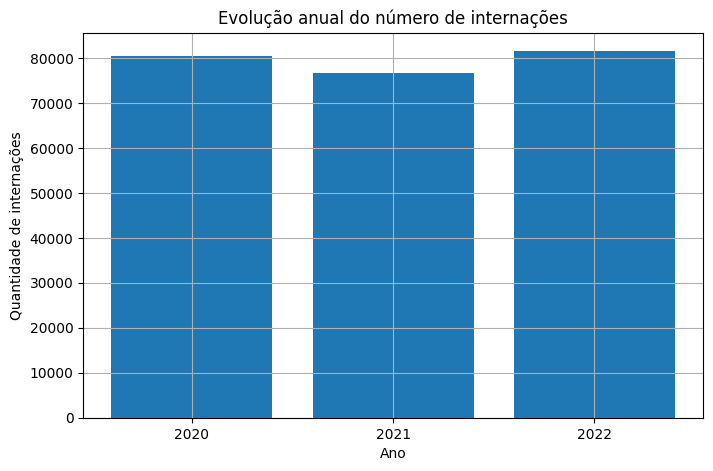

In [ ]:
internacoes_anuais = (
    df_tratado
    .groupby('ANO_CMPT')
    .size()
    .reset_index(name='qtde_internacoes')
)

plt.figure(figsize=(8,5))
plt.bar(
    internacoes_anuais['ANO_CMPT'],
    internacoes_anuais['qtde_internacoes']
)
plt.title('Evolução anual do número de internações')
plt.xlabel('Ano')
plt.ylabel('Quantidade de internações')
plt.xticks(internacoes_anuais['ANO_CMPT'])
plt.grid(True)
plt.show()

## **1.4. Perfil Sociodemográfico**

### **1.4.1. Distribuição de Idade**

**Faixas Etárias**

- Jovens: 0 a 19
- Adultos: 20 a 59
- Idosos: 60 ou mais

**Análise Inicial**

 O volume de internações por saúde mental é predominantemente concentrado na faixa de 20–59 anos, que supera em mais de quatro vezes o total de idosos (60+). Destaca-se a vida adulta como o período de maior vulnerabilidade ou registro de crises agudas, não mudando muito em relação ao período antes da pandemia.

In [ ]:
df_tratado = df_tratado.copy()

# Criando faixa etária
bins = [0, 19, 59, 120]
labels = ['0-19', '20-59', '60+']

df_tratado['faixa_etaria'] = pd.cut(
    df_tratado['IDADE'],
    bins=bins,
    labels=labels,
    right=True
)

# Quantidade por faixa etária
qtde_faixa_etaria = (
    df_tratado['faixa_etaria']
    .value_counts()
    .sort_index()
    .reset_index()
)

qtde_faixa_etaria.columns = ['faixa_etaria', 'quantidade']
qtde_faixa_etaria

In [ ]:
plt.figure(figsize=(8,5))
qtde_faixa_etaria.set_index('faixa_etaria')['quantidade'].plot(kind='bar')
plt.title('Distribuição de internações por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Número de internações')
plt.show()

### **1.4.2. Distribuição Por Sexo**

**Dicionário dos dados**
- 1: Masculino
- 3: Feminino

**Análise Inicial**

O público masculino representa a maioria expressiva das internações (61,60%). Esse dado indica uma maior prevalência de crises agudas ou menor busca por tratamento preventivo entre os homens, resultando em mais hospitalizações. Uma das hipóteses é o preconceito que homens sofrem ao falar sobre saúde mental.

In [ ]:
df_tratado['SEXO'] = df_tratado['SEXO'].replace({
    '1': 'Masculino',
    '3': 'Feminino'
})

In [ ]:
distrib_sexo = (
    df_tratado['SEXO']
    .value_counts()
    .reset_index()
)

distrib_sexo.columns = ['sexo', 'quantidade']
print('Distribuição por Sexo')
print('-'*50)
print(distrib_sexo)
print('-'*50)

# Percentual de cada sexo
distrib_sexo['percentual'] = (
    distrib_sexo['quantidade']
    / distrib_sexo['quantidade'].sum()*100
)
print('Percentual de Distribuição de Sexo')
print('-'*50)
distrib_sexo

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(6,5))
plt.bar(distrib_sexo['sexo'], distrib_sexo['quantidade'], width = 0.3)
plt.title('Distribuição Por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

### **1.4.3. Distribuição de Raça/Cor**

**Dicionário dos dados**
- 01: Branca
- 02: Parda
- 03: Preta
- 04: Amarela
- 05: Indigena
- 99: Ignorado

**Análise Inicial**

A predominância de pacientes brancos (53%) contrasta com a soma de pretos e pardos (35%), sugerindo disparidades no acesso ou no perfil das internações. Chama a atenção o alto volume de dados ignorados (10%), o que prejudica a precisão das políticas de equidade, enquanto a baixa presença de indígenas e amarelos aponta para uma possível exclusão ou subnotificação severa desses grupos no sistema.

In [ ]:
df_tratado['RACA_COR'] = df_tratado['RACA_COR'].replace({
    '01': 'Branca',
    '02': 'Parda',
    '03': 'Preta',
    '04': 'Amarela',
    '05': 'Indigena',
    '99': 'Ignorado'
})

In [ ]:
distrib_raca = (
    df_tratado['RACA_COR']
    .value_counts()
    .reset_index()
)

distrib_raca.columns = ['raca', 'quantidade']
print('Distribuição Por Rça/Cor')
print('-'*50)
print(distrib_raca)
print('-'*50)

distrib_raca['percentual'] = (
    distrib_raca['quantidade']
    / distrib_raca['quantidade'].sum()*100
)

print('Percentual de Distribuição de Raça/Cor')
print('-'*50)
distrib_raca

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(distrib_raca['raca'], distrib_raca['quantidade'], width = 0.5
        )
plt.title('Distribuição Por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Quantidade')

## **1.5. Diagnóstico**

### **1.5.1. Top 10 Diagnóstico**

- 1º F200: Esquizofrenia paranóide
- 2º F192: Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas - síndrome de dependência
- 3º F102: Transtornos mentais e comportamentais devidos ao uso de álcool - síndrome de dependência
- 4º F29: Psicose não-orgânica não especificada
- 5º F312: Transtorno afetivo bipolar, episódio atual maníaco com sintomas psicóticos
- 6º F205: Esquizofrenia residual
- 7º F142: Transtornos mentais e comportamentais devidos ao uso da cocaína - síndrome de dependência
- 8º F322: Episódio depressivo grave sem sintomas psicóticos
- 9º F208: Outras esquizofrenias
- 10º F028: Demência em outras doenças especificadas classificadas em outra parte

O ranking é liderado por esquizofrenia (F200) e dependência de múltiplas drogas (F192), evidenciando que o sistema foca em casos de altíssima complexidade. A forte presença de álcool e cocaína (F102, F142) indica uma crise de dependência química que sobrecarrega os leitos hospitalares. Psicoses e episódios maníacos (F29, F312) reforçam que a internação é usada como último recurso para conter crises agudas. Esse perfil de diagnósticos graves revela a carência de suporte preventivo na rede básica de saúde. Assim, o topo da lista expõe um cenário de contenção de danos em patologias severas e crônicas.


In [ ]:
top_10_diag_periodo = (
  df_tratado['DIAG_PRINC']
  .value_counts()
  .head(10)
)

print(top_10_diag_periodo)

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(top_10_diag_periodo.index, top_10_diag_periodo.values, color='blue')
plt.title('Top 10 Diagnósticos No Período Pré-Pandemia')
plt.xlabel('Diagnóstico')
plt.ylabel('Quantidade de internações')
for i, v in enumerate(top_10_diag_periodo.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=10)
plt.show()

## **1.6. Análise Geográfica**

### **1.6.1. Fluxo de Origem-Destino**
**Análise Inicial**

Quase 40% dos pacientes são obrigados a viajar para se tratar, provando que a saúde mental em SP é centralizada e desigual. Isso isola o paciente da família e sobrecarrega as cidades grandes, revelando que a rede local de muitas cidades é insuficiente ou inexistente.

In [ ]:
df_tratado['evasao'] = df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']
taxa_evasao = df_tratado['evasao'].mean()*100
print(f'Taxa de evasão fora do município de residência: {taxa_evasao:.2f}')

Taxa de evasão fora do município de residência: 39.22


### **1.6.2 Município de Residência vs de Internação**

**Análise Inicial**

Observa-se que diversos municípios apresentam 100% de evasão nas internações em saúde mental, indicando ausência de atendimento local. Em alguns casos, o volume absoluto é baixo; contudo, há municípios com mais de 30 ou 40 internações totalmente realizadas fora do território de residência, o que evidencia dependência estrutural de cidades-polo e possível desigualdade na distribuição regional dos serviços especializados.

In [ ]:
# Criando a tabela de frequência de Origem -> Destino
fluxo_municipios = (
    df_tratado.groupby(['MUNIC_RES', 'MUNIC_MOV'])
    .size()
    .reset_index(name='quantidade')
    .sort_values('quantidade', ascending=False)
)

# Filtrando apenas internações que ocorreram FORA do município de residência
evasao_municipios = fluxo_municipios[fluxo_municipios['MUNIC_RES'] != fluxo_municipios['MUNIC_MOV']]

print("Top 10 Maiores Fluxos de Evasão (Cidade Origem -> Cidade Destino)")
print(evasao_municipios.head(10))

### **1.6.3. Cidades fora de SP que mais dependem de outros municípios**

**Análise Inicial**

Existem municípios com 100% de taxa de evasão, o que significa que nenhum paciente consegue ser atendido em sua própria cidade. Esse dado revela um vazio assistencial total nessas localidades, onde a dependência de outros municípios é absoluta devido à falta completa de leitos ou hospitais psiquiátricos para a população local.

In [ ]:
# Total de internações por cidade de residência
total_residente = df_tratado.groupby('MUNIC_RES').size()

# Total de internações feitas FORA da cidade de residência
total_fora = evasao_municipios.groupby('MUNIC_RES')['quantidade'].sum()

# Taxa de Dependência Externa (%)
taxa_dependencia = (total_fora / total_residente * 100).fillna(0).sort_values(ascending=False)

print("Cidades fora do SP que mais dependem de outros municípios (Taxa de Evasão %):")
print(taxa_dependencia.head(10))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (pegando o top 10 e transformando em DataFrame)
top_10_dep = taxa_dependencia.head(10).reset_index()
top_10_dep.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_dep,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Cores quentes para indicar alerta/dependência
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios com Maior Dependência de Outras Cidades\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Taxa de Evasão (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando os valores das porcentagens ao lado das barras
for i, v in enumerate(top_10_dep['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.xlim(0, 115) # Espaço extra para o texto não cortar
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

### **1.6.4. Cidades de SP que mais dependem de outros municípios**

**Análise Inicial**

Diversos municípios paulistas apresentam 100% de taxa de evasão, o que caracteriza um vazio assistencial absoluto na rede de saúde mental. Nessas localidades, não existe nenhuma estrutura própria para internação, o que torna a dependência de cidades vizinhas total e obriga 100% dos pacientes a buscarem socorro hospitalar fora de seu local de residência.

In [ ]:
# Filtra apenas pacientes que MORAM em São Paulo (códigos começando com 35)
df_sp = df_tratado[df_tratado['MUNIC_RES'].astype(str).str.startswith('35')]

# Agora refaça o cálculo com df_sp
total_residente_sp = df_sp.groupby('MUNIC_RES').size()
total_fora_sp = evasao_municipios[evasao_municipios['MUNIC_RES'].astype(str).str.startswith('35')].groupby('MUNIC_RES')['quantidade'].sum()

taxa_dependencia_sp = (total_fora_sp / total_residente_sp * 100).fillna(0).sort_values(ascending=False)

print("Cidades de SP que mais dependem de outros municípios:")
print(taxa_dependencia_sp.head(10))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 cidades de SP com maior evasão)
top_10_sp = taxa_dependencia_sp.head(10).reset_index()
top_10_sp.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_sp,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Vermelho para indicar alerta/falta de serviço
)

# 3. Ajustes de títulos e rótulos
plt.title('Vazios Assistenciais: Municípios de SP com 100% de Evasão\n(Internações em Saúde Mental)', fontsize=14)
plt.xlabel('Taxa de Dependência Externa (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando o rótulo de 100% ao lado de cada barra
for i, v in enumerate(top_10_sp['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.xlim(0, 115) # Ajusta o limite para o texto não sair do gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### **1.6.5. Top 10 Cidades que mais recebem pacientes de outros municípios**

**Análise Inicial**

Enquanto muitos municípios sofrem com a falta de leitos, cidades como Itu (352260) e Amparo (350190) atuam como grandes polos receptores, absorvendo a demanda de toda a sua região. O destaque fica para Itu, que recebeu sozinha mais de 13 mil pacientes de outras localidades, confirmando que a rede de saúde mental paulista é sustentada por alguns centros de referência que sobrecarregam sua estrutura para suprir os vazios assistenciais das cidades vizinhas.


In [ ]:
# 1. Filtra apenas casos onde o paciente saiu da sua cidade (Evasão)
df_fora = df_tratado[df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']]

# 2. Conta quem mais recebeu esses pacientes "estrangeiros"
hubs_hospitalares = (
    df_fora.groupby('MUNIC_MOV')
    .size()
    .reset_index(name='pacientes_recebidos')
    .sort_values('pacientes_recebidos', ascending=False)
)

print("Top 10 Cidades que mais recebem pacientes de outros municípios:")
print(hubs_hospitalares.head(10))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 hubs)
top_10_hubs = hubs_hospitalares.head(10).copy()

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_hubs,
    x='pacientes_recebidos',
    y='MUNIC_MOV',
    palette='Blues_r' # Usando azul para diferenciar do gráfico de dependência (vermelho)
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios Hubs: Maiores Receptores de Pacientes Externos\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Quantidade de Pacientes de Outras Cidades', fontsize=12)
plt.ylabel('Código do Município (Local da Internação)', fontsize=12)

# Adicionando os valores exatos ao lado das barras
for i, v in enumerate(top_10_hubs['pacientes_recebidos']):
    plt.text(v + (v * 0.01), i, f'{int(v)}', va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

## **1.7. Óbito**

### **1.7.1. Taxa de Óbito Por Ano**

**Análise Inicial**

A análise da taxa de mortalidade durante a pandemia revela que o ano de 2021 foi o período mais crítico, atingindo o pico de 0,34%. Esse aumento reflete o agravamento dos desfechos clínicos no momento mais severo da crise sanitária, seguido por uma redução para 0,30% em 2022, patamar que ainda permanece superior ao registrado no início da série em 2020 (0,27%).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Garante que a coluna MORTE seja numérica (0 ou 1)
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por ano
taxa_obito_ano = (df_tratado.groupby('ANO_CMPT')['MORTE'].mean() * 100).reset_index()
taxa_obito_ano.columns = ['Ano', 'Taxa_Obito']

# 3. Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=taxa_obito_ano, x='Ano', y='Taxa_Obito', palette='mako')

# Ajustes de título e eixos
plt.title('Taxa de Mortalidade Hospitalar por Ano (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Ano ', fontsize=12)

# Adicionando os valores em cima das barras para facilitar a leitura
for i, v in enumerate(taxa_obito_ano['Taxa_Obito']):
    plt.text(i, v + (v * 0.02), f'{v:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Se estiver no Jupyter/Colab use plt.show(), se quiser salvar use:
plt.savefig('taxa_obito_ano.png')
plt.show()

### **1.7.2. Óbito Por Idade**

**Análise Inicial**

Esta análise das taxas de óbito por faixa etária durante a pandemia reforça que a idade é o principal fator de risco para a letalidade hospitalar em saúde mental. Enquanto as faixas de 0-19 anos (0,14%) e 20-59 anos (0,21%) mantiveram índices relativamente baixos, a população com 60 anos ou mais apresentou uma taxa de 0,92%, um valor significativamente superior aos demais grupos. Essa disparidade evidencia a alta vulnerabilidade dos idosos no sistema hospitalar durante o período crítico da crise sanitária.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criando as faixas etárias conforme pedido (0-19, 20-59, 60+)
# Usamos -1 para garantir que a idade 0 seja incluída
bins = [-1, 19, 59, 120]
labels = ['0-19', '20-59', '60+']
df_tratado['faixa_etaria'] = pd.cut(df_tratado['IDADE'], bins=bins, labels=labels)

# 2. Calculando a taxa de óbito por faixa
morte_por_idade = df_tratado.groupby('faixa_etaria')['MORTE'].mean() * 100

# 3. Gerando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=morte_por_idade.index, y=morte_por_idade.values, palette='Blues')

plt.title('Taxa de Óbito por Faixa Etária (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)

# Adicionando os valores nas barras
for i, v in enumerate(morte_por_idade.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.3. Óbito Por Sexo**

**Análise Inicial**

A análise da letalidade hospitalar por gênero durante a pandemia revela que o sexo Masculino apresentou um índice de 0,32%, sendo proporcionalmente superior ao registrado pelo sexo Feminino (0,28%). Essa diferença reforça que, além do fator idade, o gênero masculino constituiu um grupo de maior vulnerabilidade para desfechos fatais em internações de saúde mental no estado de São Paulo durante o período de crise sanitária.

In [ ]:
# 1. Garante que a coluna MORTE é numérica
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por sexo
taxa_obito_sexo = df_tratado.groupby('SEXO')['MORTE'].mean() * 100

# 4. Gráfico
plt.figure(figsize=(7, 5))
sns.barplot(x=taxa_obito_sexo.index, y=taxa_obito_sexo.values, palette='Blues', width=0.4)

plt.title('Taxa de Óbito por Sexo (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Sexo')

plt.ylim(0, taxa_obito_sexo.values.max() * 1.15)

for i, v in enumerate(taxa_obito_sexo.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.4. Óbito Por Raça/Cor**

**Análise Inicial**

In [ ]:
# 1. Calcula a taxa e já ordena do menor para o maior
taxa_obito_raca = (df_tratado.groupby('RACA_COR')['MORTE'].mean() * 100).sort_values()

# 3. Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_obito_raca.index, y=taxa_obito_raca.values, palette='Blues', width=0.5)

plt.title('Taxa de Óbito por Raça/Cor (Ordem Crescente)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.ylim(0, taxa_obito_raca.values.max() * 1.2)

for i, v in enumerate(taxa_obito_raca.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()